In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Notes
I'm using Jetbrains' DataSpell for the jupyter notebook. What you see might be different from mine.
For example, using `df` from DataSpell exposes all column's statistics which you might not see:


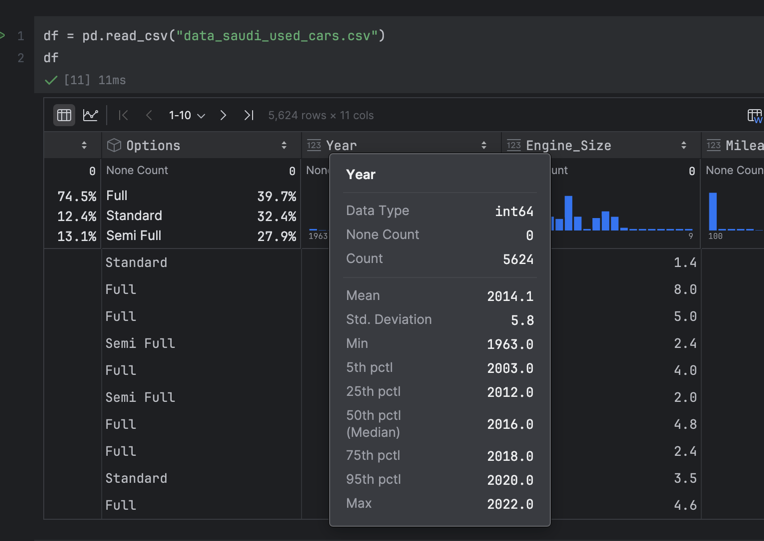

## Do we need zero price data?

In [24]:
df = pd.read_csv("data_saudi_used_cars.csv")
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [14]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [13]:
df.loc[df["Negotiable"] == 1]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [15]:
df.loc[df["Negotiable"] == 1].describe()

,Year,Engine_Size,Mileage,Price
count,1796.000000,1796.000000,1.796000e+03,1796.0
mean,2012.502227,3.541425,1.685745e+05,0.0
std,6.757189,1.602007,3.920342e+05,0.0
min,1965.000000,1.000000,1.000000e+02,0.0
25%,2010.000000,2.400000,1.575000e+04,0.0
50%,2014.000000,3.500000,1.000000e+05,0.0
75%,2017.000000,4.600000,2.212500e+05,0.0
max,2022.000000,9.000000,9.999999e+06,0.0


In [10]:
df.loc[df["Negotiable"] == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [16]:
df.loc[df["Negotiable"] == 0].describe()

,Year,Engine_Size,Mileage,Price
count,3828.000000,3828.000000,3.828000e+03,3828.000000
mean,2014.852403,3.180016,1.426419e+05,77975.053030
std,5.109197,1.458554,3.782114e+05,72728.132801
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.830000e+05,94000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


Cars with negotiable prices lean towards older cars, but not by much. Still, I can't find any useful use case with negotiable
cars.

## Preparing Data

In [34]:
df_non_negotiable = df.loc[df["Negotiable"] == 0].drop(["Negotiable"], axis=1)

In [30]:
df_non_negotiable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3827 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3827 non-null   object 
 1   Region       3827 non-null   object 
 2   Make         3827 non-null   object 
 3   Gear_Type    3827 non-null   object 
 4   Origin       3827 non-null   object 
 5   Options      3827 non-null   object 
 6   Year         3827 non-null   int64  
 7   Engine_Size  3827 non-null   float64
 8   Mileage      3827 non-null   int64  
 9   Price        3827 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 328.9+ KB


No null values detected

In [31]:
df_non_negotiable.duplicated().sum()

3

Even though we have duplicate data, we won't remove them. First, because it's so little. Second, it will
accentuate for that particular features, the price is usually in that number.

In [32]:
df_non_negotiable

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


Now we're going to check the price if it makes sense. Super high price makes sense since we see many sport cars. But low price (<10) exists. 10 riyals is
40000 rupiahs. No cars are that cheap.

In [38]:
df_non_negotiable["Price"].describe()

count      3828.000000
mean      77975.053030
std       72728.132801
min           0.000000
25%       35000.000000
50%       58000.000000
75%       94000.000000
max      850000.000000
Name: Price, dtype: float64

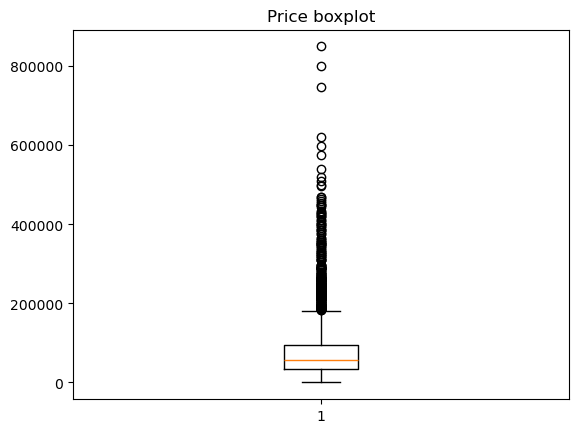

In [36]:
plt.boxplot(df_non_negotiable["Price"])
plt.title("Price boxplot")
plt.show()

In [41]:
df_non_negotiable.nsmallest(10, "Price")

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,0
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,1002


In [45]:
df_non_negotiable["Price"].quantile([0.01,0.013,0.015,0.017,0.018,0.02,0.03])

0.010     1626.350
0.013     2108.803
0.015     2494.550
0.017     4000.000
0.018     4943.000
0.020     6270.000
0.030    10000.000
Name: Price, dtype: float64

Ok, I think 4000 riyals makes sense. We'll filter records less than 4000 riyals. And it only takes 1.7% of our dataset, we can lose that much.

In [48]:
df_price = df_non_negotiable.loc[df["Price"] >= 4000]
df_price.describe()

,Year,Engine_Size,Mileage,Price
count,3764.000000,3764.000000,3.764000e+03,3764.000000
mean,2014.786929,3.187726,1.439476e+05,79273.996546
std,5.114088,1.461532,3.811833e+05,72652.522091
min,1963.000000,1.000000,1.000000e+02,4000.000000
25%,2013.000000,2.000000,4.900000e+04,36000.000000
50%,2016.000000,2.700000,1.042445e+05,58000.000000
75%,2018.000000,4.000000,1.840000e+05,95000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


Dropping region and origin here. Where we bought cars doesn't really matter on the price, especially if we're talking prices on the same country.

In [49]:
df_without_location = df_price.drop(["Region","Origin"], axis=1)
df_without_location

,Type,Make,Gear_Type,Options,Year,Engine_Size,Mileage,Price
1,Yukon,GMC,Automatic,Full,2014,8.0,80000,120000
2,Range Rover,Land Rover,Automatic,Full,2015,5.0,140000,260000
3,Optima,Kia,Automatic,Semi Full,2015,2.4,220000,42000
5,CX3,Mazda,Automatic,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Porsche,Automatic,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...
5616,CX9,Mazda,Automatic,Full,2020,2.0,9500,132000
5618,Suburban,GMC,Automatic,Full,2006,5.3,86000,50000
5619,X-Trail,Nissan,Automatic,Standard,2018,2.5,78794,68000
5621,Yukon,GMC,Automatic,Full,2016,5.3,48000,145000


Separating car's maker and type doesn't make sense. There's no way Hyundai has Land Cruiser. We'll join them as one feature.

In [52]:
df_without_location["MakerType"] = df_without_location["Make"] + "-" + df_without_location["Type"]
df_car_maker = df_without_location.drop(["Make", "Type"], axis=1).loc[:,  ["MakerType", "Gear_Type", "Options", "Engine_Size", "Year", "Mileage", "Price"]]
df_car_maker

,MakerType,Gear_Type,Options,Engine_Size,Year,Mileage,Price
1,GMC-Yukon,Automatic,Full,8.0,2014,80000,120000
2,Land Rover-Range Rover,Automatic,Full,5.0,2015,140000,260000
3,Kia-Optima,Automatic,Semi Full,2.4,2015,220000,42000
5,Mazda-CX3,Automatic,Semi Full,2.0,2019,25000,58000
6,Porsche-Cayenne S,Automatic,Full,4.8,2012,189000,85000
...,...,...,...,...,...,...,...
5616,Mazda-CX9,Automatic,Full,2.0,2020,9500,132000
5618,GMC-Suburban,Automatic,Full,5.3,2006,86000,50000
5619,Nissan-X-Trail,Automatic,Standard,2.5,2018,78794,68000
5621,GMC-Yukon,Automatic,Full,5.3,2016,48000,145000


Let's check if we have some typos in the Maker and type

In [60]:
sorted(df_car_maker["MakerType"].unique())

['Aston Martin-DB9',
 'Aston Martin-Vanquish',
 'Audi-A3',
 'Audi-A4',
 'Audi-A5',
 'Audi-A6',
 'Audi-A7',
 'Audi-A8',
 'Audi-Q5',
 'Audi-Q7',
 'Audi-S5',
 'Audi-S8',
 'BMW-The 3',
 'BMW-The 4',
 'BMW-The 5',
 'BMW-The 6',
 'BMW-The 7',
 'BMW-The M',
 'BMW-X',
 'BMW-Z',
 'BYD-F3',
 'Bentley-Bentayga',
 'Bentley-Flying Spur',
 'Cadillac-ATS',
 'Cadillac-CT-S',
 'Cadillac-CT4',
 'Cadillac-CT5',
 'Cadillac-CT6',
 'Cadillac-Escalade',
 'Cadillac-Fleetwood',
 'Cadillac-XT5',
 'Changan-CS35',
 'Changan-CS35 Plus',
 'Changan-CS75',
 'Changan-CS85',
 'Changan-CS95',
 'Changan-Eado',
 'Changan-Seven',
 'Chery-Tiggo',
 'Chevrolet-Abeka',
 'Chevrolet-Aveo',
 'Chevrolet-Blazer',
 'Chevrolet-Camaro',
 'Chevrolet-Caprice',
 'Chevrolet-Colorado',
 'Chevrolet-Cruze',
 'Chevrolet-Impala',
 'Chevrolet-Kaptiva',
 'Chevrolet-Lumina',
 'Chevrolet-Malibu',
 'Chevrolet-Optra',
 'Chevrolet-Silverado',
 'Chevrolet-Spark',
 'Chevrolet-Suburban',
 'Chevrolet-Tahoe',
 'Chevrolet-Trailblazer',
 'Chevrolet-Traverse

In [62]:
["Mitsubishi-Other", "Other-Other", "Porsche-Other"]

['Mitsubishi-Other', 'Other-Other', 'Porsche-Other']

Ok, turns out we have car's type "Other" which isn't really helpful. We'll remove them as well.

In [61]:
df_without_location["MakerType"] = df_without_location["Make"] + "-" + df_without_location["Type"]
df_car_maker = df_without_location.loc[df_without_location["Type"] != "Other"].drop(["Make", "Type"], axis=1).loc[:,  ["MakerType", "Gear_Type", "Options", "Engine_Size", "Year", "Mileage", "Price"]]
df_car_maker

,MakerType,Gear_Type,Options,Engine_Size,Year,Mileage,Price
1,GMC-Yukon,Automatic,Full,8.0,2014,80000,120000
2,Land Rover-Range Rover,Automatic,Full,5.0,2015,140000,260000
3,Kia-Optima,Automatic,Semi Full,2.4,2015,220000,42000
5,Mazda-CX3,Automatic,Semi Full,2.0,2019,25000,58000
6,Porsche-Cayenne S,Automatic,Full,4.8,2012,189000,85000
...,...,...,...,...,...,...,...
5616,Mazda-CX9,Automatic,Full,2.0,2020,9500,132000
5618,GMC-Suburban,Automatic,Full,5.3,2006,86000,50000
5619,Nissan-X-Trail,Automatic,Standard,2.5,2018,78794,68000
5621,GMC-Yukon,Automatic,Full,5.3,2016,48000,145000
